In [48]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from scipy.stats import sem 
from scipy.stats import linregress 
from sklearn import datasets

In [49]:
# download and cread df by data file 1 named below 
mouse_metadata_df =pd.read_csv("data/Mouse_metadata.csv")
mouse_metadata_df.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17


In [50]:
# no duplicates int this data when start
check_dupl_mouse_df =mouse_metadata_df[mouse_metadata_df.duplicated(["Mouse ID"])]
print(check_dupl_mouse_df)

Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


In [51]:
# # download and cread df by data file 2 named below 
study_results_df = pd.read_csv("data/Study_results.csv")
study_results_df.head(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0


In [52]:
# checking how many unique mouse studies by checking mouse study data 
mouse_id_count =len(study_results_df["Mouse ID"].unique()) 
# when i use .unique() I can get the series of mouseID's and
# get length of it will tell me how many unique mouse there are
mouse_id_count
# check the number of mice

249

In [53]:
# Combine mouse data and stduy meta data od mouse into a single dataset
# Start working and getting statistics from this df
combined_df = pd.merge(study_results_df, mouse_metadata_df, how = "outer", on = "Mouse ID")
combined_df.head(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22


In [54]:
# Find any duplicate rows with the same Mouse ID's and Timepoints from 
    # We suppose to haev 248 mouse, therefore need to check the data for any mouse ID 
    # with duplicate time points and 
    # remove any data associated with that mouse ID.
dupl_mouse_df =combined_df[combined_df.duplicated(["Mouse ID","Timepoint"], keep=False)]
dupl_mouse_df.head(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.0,0,Propriva,Female,21,26
861,g989,0,45.0,0,Propriva,Female,21,26


In [55]:
# since time point is only in the study table i just work with study table
# keeping all records except rows that located by using loc func for 
# specific mouse id "g989"
cleaned_combined_df = combined_df.loc[combined_df["Mouse ID"] != "g989"]
cleaned_combined_df.head(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22


In [56]:
# Recheck the number of mice
mouse_id_count_nondupl =len(cleaned_combined_df["Mouse ID"].unique())
# by doing this I will the list/dataseries of unique mouse id, and
# length of it will give me the how many unique mouse it the study
mouse_id_count_nondupl 

248

In [57]:
# Start working and getting statistics from this df
cleaned_combined_df = cleaned_combined_df.fillna(0)
cleaned_combined_df.head(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22


In [58]:
cleaned_combined_df.isnull().any().any()

False

## Summary Statistics

In [59]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each drug regimen.
mean = cleaned_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
#  median, variance,standard deviation, and SEM of the tumor volume for each regimen
median = cleaned_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
#variance,standard deviation, and SEM of the tumor volume for each regimen
variance = cleaned_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_div = cleaned_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
#SEM of the tumor volume for each regimen
sem_err = cleaned_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


In [60]:
# single line using agg func get the summary statistics table 
summ_stat_df = cleaned_combined_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median","var","std","sem"]})
summ_stat_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [61]:
# counted_by_drug_reg_df= cleaned_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].count()
# counted_by_drug_reg_df

In [62]:
#print(f"categories of drugs : {len(counted_by_drug_reg_df)}")

In [63]:
# grouped_study_df = study_results_df.groupby(["Mouse ID","Timepoint",'Tumor Volume (mm3)'])
# mouse_at_timepoints_vol= grouped_study_df.nunique()
# mouse_at_timepoints_vol.head(50)

In [64]:
## Bar and Pie Charts

In [65]:
grouped_df_to_extract= cleaned_combined_df[["Drug Regimen", "Mouse ID"]].groupby("Drug Regimen")
grouped_df_to_extract

In [66]:
num_mice_df = pd.DataFrame(grouped_df_to_extract["Mouse ID"].count())


In [67]:
num_mice_used_each_drug=num_mice_df.sort_values("Mouse ID", ascending = False)
num_mice_used_each_drug

,Mouse ID
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


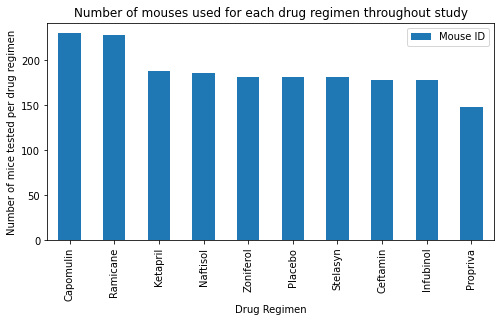

<Figure size 432x288 with 0 Axes>

In [68]:
# by pandas
# Generate a bar plot showing the total number of mouse tested 
# for each drug regimen.
# There should be a single bar per regimen
bar_chart = num_mice_used_each_drug.plot(kind="bar", figsize=(8,4))
#Set a title for the chart
bar_chart.set_ylabel("Number of mice tested per drug regimen")
bar_chart.set_title("Number of mouses used for each drug regimen throughout study")
#Display chart
plt.show()
plt.tight_layout() # to fit better

In [69]:
drug_reg =  num_mice_df.index.tolist()

In [70]:
drug_reg

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [71]:
mouse_count = num_mice_used_each_drug["Mouse ID"].tolist()
mouse_count

[230, 228, 188, 186, 182, 181, 181, 178, 178, 148]

In [72]:
x_axis = np.arange(len(drug_reg))

In [73]:
tick_loc = [value  for value in x_axis]

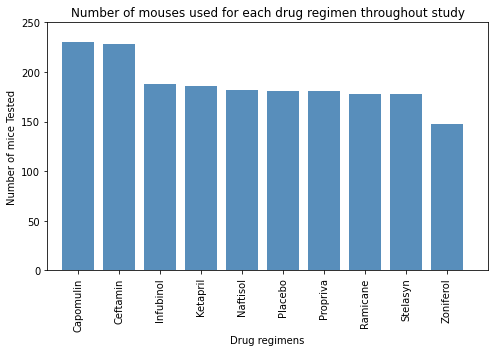

In [74]:
# plotting by pyplot
plt.figure(figsize=(7,5))
plt.bar(x_axis, mouse_count, color="steelblue", alpha=0.9, align="center")
plt.xticks(tick_loc, drug_reg, rotation="vertical") # drug regime is name for bar 

plt.xlabel("Drug regimens")
plt.ylabel("Number of mice Tested")
plt.title("Number of mouses used for each drug regimen throughout study")
plt.xlim(-0.75, 10)
plt.ylim(0, 250)
plt.tight_layout()
plt.show()

In [75]:
# grouped by gender 
gender_group = cleaned_combined_df[["Mouse ID","Sex"]].groupby("Sex")
gender_group

In [76]:
gender_group_count = gender_group["Mouse ID"].count()
gender_group_count

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

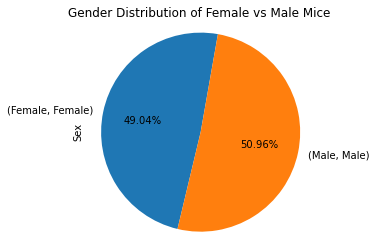

Sex     Sex   
Female  Female    922
Male    Male      958
Name: Sex, dtype: int64

In [77]:
# by panda 
fig2, ax2 = plt.subplots(figsize=(4, 4))
gender_df = gender_group["Sex"].value_counts()
gender_df.plot(kind = "pie",autopct='%1.2f%%',
            title = "Gender Distribution of Female vs Male Mice", 
               fontsize = 10, startangle=80)

plt.axis("equal")
plt.show()
gender_df

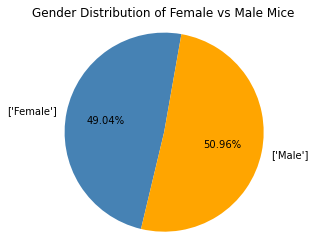

In [78]:
#by pyplot
fig3, ax3 = plt.subplots(figsize =(4,4))
labels = gender_group["Sex"].unique()
plt.pie(gender_df,autopct='%1.2f%%', 
        labels=labels,
        colors = ("steelblue","orange"),
        textprops={'fontsize': 10}, startangle=80)
plt.title("Gender Distribution of Female vs Male Mice")
plt.axis("equal")

plt.show()


## Quartiles, Outliers and Boxplots

In [79]:
# Calculate the final tumor volume of each mouse 
# across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe 
# to get the tumor volume at the last timepoint

In [80]:
# I wanted to see how Tumor Volume looks at each Timepoint 
# by each mouse ID and each kind of drug as well
grouped_cleancombo_df = cleaned_combined_df.groupby(["Drug Regimen","Mouse ID","Timepoint",'Tumor Volume (mm3)'])
mouse_at_timepoints_tumor_vol= grouped_cleancombo_df.nunique()
mouse_at_timepoints_tumor_vol.head(50)

Mouse ID  Timepoint  \
Drug Regimen Mouse ID Timepoint Tumor Volume (mm3)                        
Capomulin    b128     0         45.000000                  1          1   
                      5         45.651331                  1          1   
                      10        43.270852                  1          1   
                      15        43.784893                  1          1   
                      20        42.731552                  1          1   
                      25        43.262145                  1          1   
                      30        40.605335                  1          1   
                      35        37.967644                  1          1   
                      40        38.379726                  1          1   
                      45        38.982878                  1          1   
             b742     0         45.000000                  1          1   
                      5         41.534097                  1          1   
                      10        41.999228                  1          1   
                      15        39.524843                  1          1   
                      20        37.950355                  1          1   
                      25        38.617684                  1          1   
                      30        39.167949                  1          1   
                      35        39.847576                  1          1   
                      40        38.255627                  1          1   
                      45        38.939633                  1          1   
             f966     0         45.000000                  1          1   
                      5         38.796474                  1          1   
                      10        35.624403                  1          1   
                      15        32.623003                  1          1   
                      20        30.485985                  1          1   
             g288     0         45.000000                  1          1   
                      5         45.839400                  1          1   
                      10        46.304003                  1          1   
                      15        42.172301                  1          1   
                      20        42.957120                  1          1   
                      25        42.368692                  1          1   
                      30        42.874461                  1          1   
                      35        38.954115                  1          1   
                      40        36.356851                  1          1   
                      45        37.074024                  1          1   
             g316     0         45.000000                  1          1   
                      5         44.022752                  1          1   
                      10        44.502042                  1          1   
                      15        45.216743                  1          1   
                      20        45.933322                  1          1   
                      25        46.809225                  1          1   
                      30        44.221480                  1          1   
                      35        44.702833                  1          1   
                      40        45.565821                  1          1   
                      45        40.159220                  1          1   
             i557     0         45.000000                  1          1   
                      5         42.261665                  1          1   
                      10        42.992077                  1          1   
                      15        43.529876                  1          1   
                      20        43.967895                  1          1   

                                                    Tumor Volume (mm3)  \
Drug Regimen Mouse ID Timepoint Tumor Volume (mm3)                       
Cap

In [81]:
treatment_regimes = cleaned_combined_df[cleaned_combined_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
#treatment_regimes = treatment_regimes.sort_values(["Timepoint"], ascending=True)
treatment_regimes

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [82]:
treatment_regimes_data_extracted = treatment_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
treatment_regimes_data_extracted

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,0,45.000000
1,Capomulin,b128,5,45.651331
2,Capomulin,b128,10,43.270852
3,Capomulin,b128,15,43.784893
4,Capomulin,b128,20,42.731552
...,...,...,...,...
1888,Capomulin,m601,25,33.118756
1889,Capomulin,m601,30,31.758275
1890,Capomulin,m601,35,30.834357
1891,Capomulin,m601,40,31.378045


In [83]:
# in order to see last time point of the tumor volume for each mice by drug types 
# used .last()["Tumor Volume (mm3)"]
treatment_regimes_sorted = treatment_regimes_data_extracted.groupby(['Drug Regimen', 
                                                                   'Mouse ID']).last()['Tumor Volume (mm3)']
print(len(treatment_regimes_sorted))

100


In [84]:
# since there are 100 mouse left for 4 drugs 
# at max timepoint of Tumor volume I will see entire record by 
# .head(51) & .tail(51) just one row overlapping 
treatment_regimes_sorted.head(51)

Drug Regimen  Mouse ID
Capomulin     b128        38.982878
              b742        38.939633
              f966        30.485985
              g288        37.074024
              g316        40.159220
              i557        47.685963
              i738        37.311846
              j119        38.125164
              j246        38.753265
              l509        41.483008
              l897        38.846876
              m601        28.430964
              m957        33.329098
              r157        46.539206
              r554        32.377357
              r944        41.581521
              s185        23.343598
              s710        40.728578
              t565        34.455298
              u364        31.023923
              v923        40.658124
              w150        39.952347
              w914        36.041047
              x401        28.484033
              y793        31.896238
Ceftamin      a275        62.999356
              b447        45.000000
     

In [85]:
# .tail(51) to see last half 
treatment_regimes_sorted.tail(51)

Drug Regimen  Mouse ID
Ceftamin      y865        64.729837
Infubinol     a203        67.973419
              a251        65.525743
              a577        57.031862
              a685        66.083066
              c139        72.226731
              c326        36.321346
              c895        60.969711
              e476        62.435404
              f345        60.918767
              i386        67.289621
              k483        66.196912
              k804        62.117279
              m756        47.010364
              n671        60.165180
              o809        55.629428
              o813        45.699331
              q132        54.656549
              s121        55.650681
              v339        46.250112
              v719        54.048608
              v766        51.542431
              w193        50.005138
              w584        58.268442
              y163        67.685569
              z581        62.754451
Ramicane      a411        38.407618
     

In [86]:
treatment_regimes_sorted_df = treatment_regimes_sorted.to_frame()
treatment_regimes_sorted_df

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
...                                   ...
Ramicane     s508               30.276232
             u196               40.667713
             w678               43.166373
             y449               44.183451
             z578               30.638696

[100 rows x 1 columns]

In [87]:
### I am just ignore this since i am doing different method
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes    
    # add subset 
    # Determine outliers using upper and lower bounds

In [88]:
# list to do for loop 
# Put treatments into a list for for loop 
# One method to do this is the following, but you can use whatever method works for you.
list_drugs = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_tumor_vol_df = treatment_regimes_sorted_df.reset_index()
final_tumor_vol_df

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,f966,30.485985
3,Capomulin,g288,37.074024
4,Capomulin,g316,40.159220
...,...,...,...
95,Ramicane,s508,30.276232
96,Ramicane,u196,40.667713
97,Ramicane,w678,43.166373
98,Ramicane,y449,44.183451


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [89]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen
quartiles = final_tumor_vol_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"Lower quartile: {lowerq}.")
print(f"Upper quartile: {upperq}.")
print(f"Interquartile : {iqr}.")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Lower bound: {lower_bound}.")
print(f"Upper bound : {upper_bound}.")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Lower quartile: 37.187743802499995.
Upper quartile: 59.930261755000004.
Interquartile : 22.74251795250001.
Lower bound: 3.0739668737499812.
Upper bound : 94.04403868375002.
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


In [90]:
tumor_lists = final_tumor_vol_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,"[38.98287774, 38.93963263, 30.48598484, 37.074..."
Ceftamin,"[62.99935619, 45.0, 56.05774909, 55.74282869, ..."
Infubinol,"[67.97341878, 65.52574285, 57.03186187, 66.083..."
Ramicane,"[38.407618299999996, 43.04754260000001, 38.810..."


In [91]:
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]


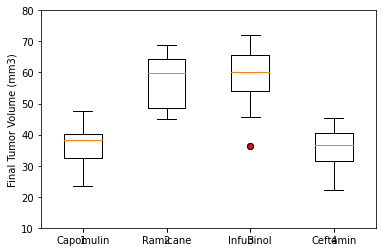

In [92]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.
red_circle=dict(markerfacecolor='r',marker='o')
plt.boxplot(tumor_vols,labels=list_drugs)
plt.boxplot(tumor_vols, flierprops=red_circle)
plt.ylim(10, 80)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [93]:
# mouse_id = input("Enter mouse it that wants line graph for Capomolin treatment : " )

NameError: name 'mouse_id' is not defined

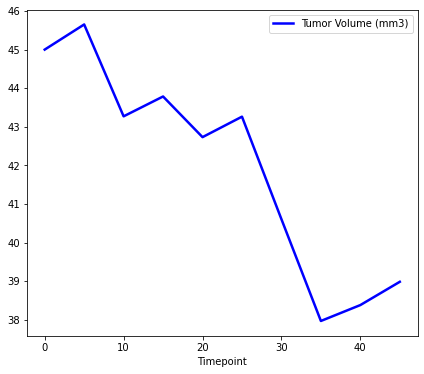

In [94]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomuli
capomulin_df = treatment_regimes_data_extracted[(treatment_regimes_data_extracted['Drug Regimen']== "Capomulin")]
mouseid_capomulin = capomulin_df[capomulin_df['Mouse ID']== 'b128'][['Timepoint','Tumor Volume (mm3)']].set_index('Timepoint')

mouseid_capomulin.plot(figsize=(7,6), linewidth=2.5, color='blue')
plt.title(mouse_id + "= Mouse ID treatment by Capomulin over timepoints")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.tight_layout()

In [95]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen
capomulin_treatment_regimes = treatment_regimes[treatment_regimes['Drug Regimen']== "Capomulin"]
capomulin_treatment_regimes.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [96]:
average_tumor = capomulin_treatment_regimes.groupby(["Mouse ID","Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()
average_tumor.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


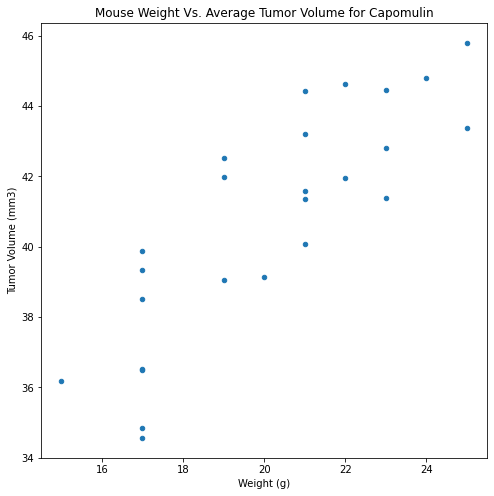

In [97]:
average_tumor.plot(kind ='scatter', x = "Weight (g)",
                   y = "Tumor Volume (mm3)", 
                   figsize=(8,8),
                  title = "Mouse Weight Vs. Average Tumor Volume for Capomulin")

## Correlation and Regression

In [98]:
avg_tumor = average_tumor['Tumor Volume (mm3)']
avg_tumor.head(3)

0    41.963636
1    40.083699
2    36.505973
Name: Tumor Volume (mm3), dtype: float64

In [99]:
mouse_weight = average_tumor['Weight (g)']
mouse_weight.head(3)

0    22
1    21
2    17
Name: Weight (g), dtype: int64

In [100]:
correlation = stats.pearsonr(mouse_weight,avg_tumor)
print(f"The correlation btwn mouse weight and ave tumor Vol for Capomulin treatment {round(correlation[0],2)}")

The correlation btwn mouse weight and ave tumor Vol for Capomulin treatment 0.84


Text(0.5, 1.0, 'Mouse Weight vs Tumor Volume(mm3) for drug Capomulin')

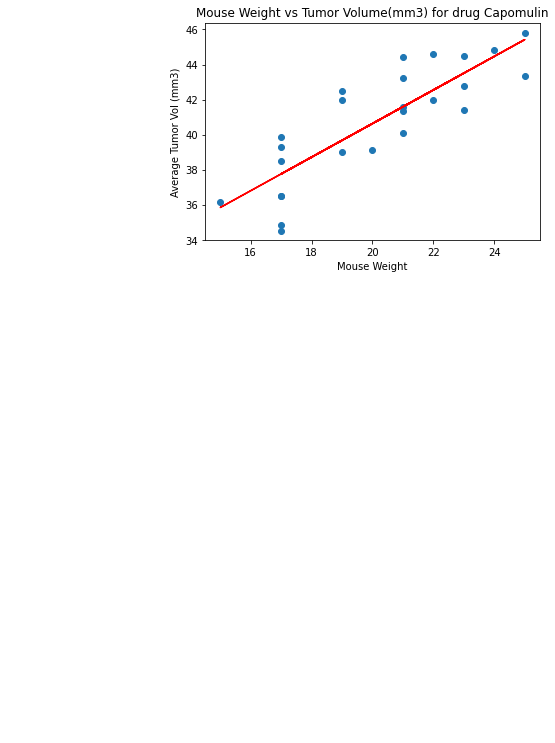

In [102]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_vals = mouse_weight
y_vals = avg_tumor
(slope,intercept,rvalue,pvalue, stderr) = stats.linregress(x_vals, y_vals)
regress_values = x_vals * slope + intercept
linear_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_vals, y_vals)
plt.plot(x_vals, regress_values, "r-")
plt.annotate(linear_equation, (8,6), fontsize=15, color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Vol (mm3)')
plt.title("Mouse Weight vs Tumor Volume(mm3) for drug Capomulin")

#plt.show()


# Observations and Insights